Analysis:
    1. Ramicane and Capomulin seems, on average, keeping the tumor volume down or at least consistant, with the sem being the smallest. Though that could be due to higher amount mice being tested for those two particular drugs.
    2. Capomulin seems to work, proving on our line chart, that it was able to bring the tumor volume of the mouse in question down successfully. However, it isn't with out relapse. As the days move on, the tumor size seems to regrow in volume. Probably a temporary measure.
    3. Ketapril	seems to be unsuccessful in it's treatment towards the mice, due to it having the highest tumor volume and and the highest SEM as well. This wouldn't be recommended for further testing.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [3]:
# Display the data table for preview
merge_mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_count= merge_mouse_df["Mouse ID"].value_counts()
len(mouse_count)

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupe=merge_mouse_df.duplicated(["Mouse ID","Timepoint"],keep=False)
mouse_dupe

merge_dupes_df=merge_mouse_df[mouse_dupe]
merge_dupes_df.sort_index(ascending=True)
dupe_mice=merge_dupes_df["Mouse ID"].unique()
dupe_mice

array(['g989'], dtype=object)

In [6]:
dupe_mouse_id=[]

for mouse in dupe_mice:
    dupe_mouse_id.append(merge_mouse_df[merge_mouse_df["Mouse ID"]==mouse])

mouse_df=pd.concat(dupe_mouse_id)
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# clean_data_mouse=merge_mouse_df[merge_mouse_df["Mouse ID"] != mouse]
# clean_data_mouse

dupe_mouse_drop=pd.DataFrame()

for mouse in dupe_mice:
    dupe_mouse_drop=(merge_mouse_df[merge_mouse_df["Mouse ID"]!=mouse])
    
# dupe_mouse_drop

dupe_mouse_drop.sort_values(by='Timepoint', ascending=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1226,n678,Propriva,Male,5,29,0,45.000000,0
1229,n763,Placebo,Female,16,25,0,45.000000,0
341,v923,Capomulin,Female,19,21,0,45.000000,0
338,w150,Capomulin,Male,23,23,0,45.000000,0
...,...,...,...,...,...,...,...,...
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1763,x402,Stelasyn,Male,21,28,45,61.619606,3
59,s508,Ramicane,Male,1,17,45,30.276232,0
360,g316,Capomulin,Female,22,22,45,40.159220,2


In [8]:
mouse_count2= dupe_mouse_drop["Mouse ID"].value_counts()
len(mouse_count2)

248

## Summary Statistics

In [9]:
# tumor_volume=dupe_mouse_drop['Tumor Volume (mm3)']

# mean_tumor = np.mean(tumor_volume)

# median_tumor = np.median(tumor_volume)

# mode_tumor = st.mode(tumor_volume)

mean_tumor=dupe_mouse_drop.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
std_tumor=dupe_mouse_drop.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
median_tumor=dupe_mouse_drop.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_tumor=dupe_mouse_drop.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sem_tumor=dupe_mouse_drop.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


Drug_Tumor_dict={
    "Mean Tumor Volume":mean_tumor,
    "Median Tumor Volume":median_tumor,
    "Tumor Volume Variance":var_tumor,
    "Tumor Volume Std. Dev.":std_tumor,
    "Tumor Volume Std. Err.":sem_tumor
}

Drug_Tumor_df=pd.DataFrame(data=Drug_Tumor_dict)
Drug_Tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
agg_drugs = dupe_mouse_drop.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
agg_drugs

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

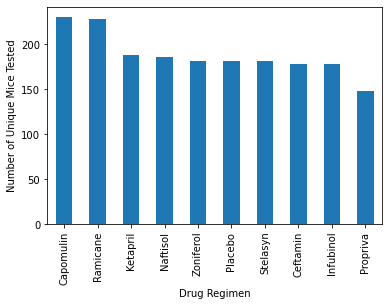

In [11]:
unique_mice_no = dupe_mouse_drop.groupby("Drug Regimen").count()
unique_mice_no_dropped=unique_mice_no.drop(['Sex','Age_months','Weight (g)', 'Timepoint','Tumor Volume (mm3)','Metastatic Sites'], axis=1)
unique_mice_no_dropped.sort_values(by='Mouse ID', ascending=False,inplace=True)
unique_mice_no_dropped.plot(kind='bar',legend=False)
plt.ylabel('Number of Unique Mice Tested')
plt.show()

## Bar and Pie Charts

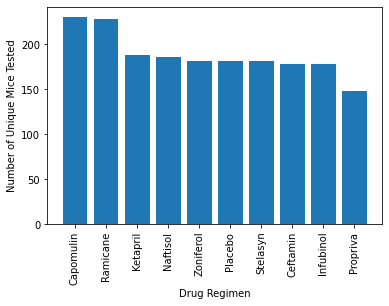

In [12]:
unique_mice_no.sort_values(by='Mouse ID', ascending=False,inplace=True)

drug_mice=unique_mice_no['Mouse ID']
drug_mice_amt=drug_mice.to_list()
# drugs=unique_mice_no['Drug Regimen'].to_list()
x_axis=unique_mice_no.index



plt.bar(x_axis,drug_mice_amt)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
# tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)
plt.show()

In [13]:
sex_mice=dupe_mouse_drop["Sex"].value_counts()
sex_mice


Male      958
Female    922
Name: Sex, dtype: int64

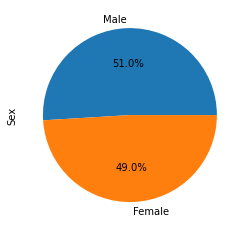

In [119]:
pie_sex_mice=sex_mice.plot(kind="pie",autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

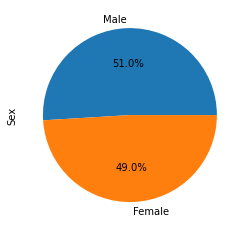

In [14]:
plt.pie(sex_mice,labels=sex_mice.index,autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
agg_drugs2=agg_drugs.drop(['Ketapril','Naftisol','Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'])
agg_drugs2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955

dupe_drop2=dupe_mouse_drop.set_index('Drug Regimen')
#dupe3=dupe_drop2.drop(['Ketapril','Naftisol','Placebo', 'Propriva', 'Stelasyn', 'Zoniferol']).sort_values('Timepoint',ascending=True)
dupe4=dupe3.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']].sort_values('Timepoint',ascending=True)


In [19]:
dupe_drop2=dupe_mouse_drop.groupby('Mouse ID').max()
greatest_timepoints=dupe_drop2[['Timepoint']]

tumor_at_timepoint=[]
for row in greatest_timepoints.iterrows():
    mouse_ID=row[0]
    timepoint= int(row[1])
    
    tumor_volume=dupe_mouse_drop.loc[(dupe_mouse_drop['Mouse ID']==mouse_ID) & (dupe_mouse_drop['Timepoint']==timepoint)]
    tumor_at_timepoint.append(tumor_volume)
tumor_at_timepoint=pd.concat(tumor_at_timepoint)
tumor_at_timepoint=tumor_at_timepoint[['Mouse ID','Tumor Volume (mm3)', 'Timepoint']]
rename_tumors={
    "Timepoint":"Last Timepoint",
    "Tumor Volume (mm3)": "Last Tumor Volume"
}
tumor_at_timepoint2=tumor_at_timepoint.rename(columns=rename_tumors)

merge_max_tumor_time=pd.merge(dupe_mouse_drop,tumor_at_timepoint2, on='Mouse ID', how='inner')
#merge_max_tumor_time2=merge_max_tumor_time.set_index('Drug Regimen')
#merge_max_tumor_time2=merge_max_tumor_time2.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']].sort_values('Timepoint',ascending=True)
merge_max_tumor_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Tumor Volume,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126,45
...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,73.867845,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,73.867845,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,73.867845,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,73.867845,45


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

In [30]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []
for drug in treatment_list:
    tumor_series=merge_max_tumor_time[merge_max_tumor_time['Drug Regimen']==drug]
#     tumor_vol_list.append(tumor_series)
    tumor_series=tumor_series[['Drug Regimen','Last Timepoint','Last Tumor Volume']]
    tumor_series.drop_duplicates(['Drug Regimen','Last Timepoint','Last Tumor Volume'],inplace=True)
    tumor_series=tumor_series["Last Tumor Volume"]
    tumor_vol_list.append(tumor_series)


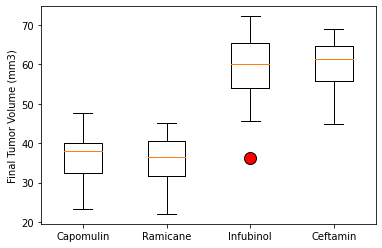

In [31]:
red_dot = dict(markerfacecolor='r', markersize=12)
plt.boxplot(tumor_vol_list, flierprops=red_dot)
plt.xticks([i for i, value in enumerate(treatment_list, start=1)], treatment_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [35]:
l509_mouse=dupe_mouse_drop[dupe_mouse_drop['Mouse ID']=="l509"]
l509_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

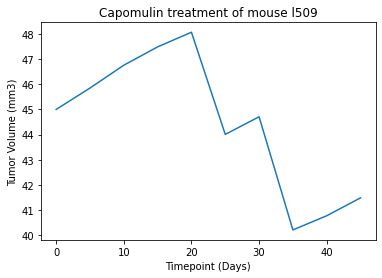

In [37]:
l509_mouse.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)",legend=False)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

In [44]:
capomulin_mice=dupe_mouse_drop[dupe_mouse_drop["Drug Regimen"]=="Capomulin"]
cap_mice_avg=capomulin_mice.groupby("Mouse ID").mean()

cap_mice_avg=cap_mice_avg[["Tumor Volume (mm3)"]]
cap_mice_avg

,Tumor Volume (mm3)
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344
i557,44.805810
i738,39.141053
j119,44.465236
j246,43.216925


In [54]:
cap_mice_avg_df=pd.merge(capomulin_mice,cap_mice_avg,on="Mouse ID")
cap_mice_avg_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143
...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,45.798970


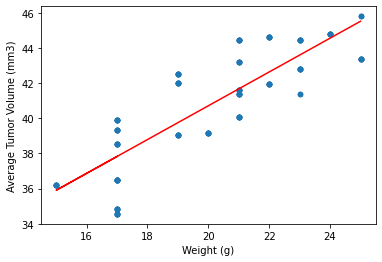

In [61]:
cap_mice_avg_df.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)_y")
plt.ylabel("Average Tumor Volume (mm3)")

mice_x=cap_mice_avg_df['Weight (g)']
mice_y=cap_mice_avg_df['Tumor Volume (mm3)_y']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mice_x, mice_y)
regress_values = mice_x * slope + intercept
plt.plot(mice_x,regress_values,color="red")
plt.show()

## Correlation and Regression